# Description

This notebook is used to tabulate final results and compare novel generated molecules vs HIV inhibitors vs Remdesivir which entered clinical trials just a few days ago.

## Now the best results and save to sdf for last double check tabulation in PyRx

In [1]:
import pandas as pd
from rdkit import Chem, DataStructs
import random
import numpy as np
import rdkit.Chem.PropertyMol

In [2]:
# './generations/master_results_table_gen10.csv'

final = pd.read_csv('./generations/master_results_table_gen10.csv',sep=',')
final = final.sort_values('score', ascending=True)
print(final.shape)
final.head()

(16548, 7)


,id,gen,smile,source,weight,logp,score
0,ABJY,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,821.205,17.61030,-13.7
1,AARK,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,859.254,18.33260,-13.1
2,AAXK,9,Cc1ccc(-c2nnnn2C2CCCCC2c2ccc(-c3nnnn3-c3cccnc3...,LSTM,765.846,6.37382,-12.8
3,ABXN,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,888.296,18.23730,-12.7
4,ACBT,10,OC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,1005.443,21.02130,-12.7


In [3]:
final[final.gen == 10]

,id,gen,smile,source,weight,logp,score
0,ABJY,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,821.205,17.61030,-13.7
1,AARK,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,859.254,18.33260,-13.1
3,ABXN,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,888.296,18.23730,-12.7
4,ACBT,10,OC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,1005.443,21.02130,-12.7
6,AAJO,10,COC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC...,LSTM,901.291,18.46180,-12.5
...,...,...,...,...,...,...,...
14741,AALR,10,C1CCNCC1,LSTM,85.150,0.75990,-3.4
14804,AAKS,10,C1CNCNC1,LSTM,86.138,-0.47320,-3.1
14828,AAJG,10,CCCC,LSTM,58.124,1.80640,-2.6
14850,ABYF,10,CO,LSTM,32.042,-0.39150,-2.1


In [4]:
final_max = final.groupby("smile").max()[["score","gen"]].reset_index()
final_max = final_max.sort_values('score', ascending=True)
print(final_max.shape)
final_max.head()

(16548, 3)


,smile,score,gen
6437,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,-13.7,10
6447,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,-13.1,10
12610,Cc1ccc(-c2nnnn2C2CCCCC2c2ccc(-c3nnnn3-c3cccnc3...,-12.8,9
6438,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,-12.7,10
16317,OC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,-12.7,10


In [5]:
final_joined = pd.merge(final_max, final, on=['smile','gen'], suffixes=('_old','_new'), how='left')

# final_joined = final_joined[(final_joined['score_new'] <= -15.0) & (final_joined['weight'] < 900)]
# final_joined = final_joined[(final_joined['score_new'] <= -7.8) & (final_joined['logp']<5)]
final_joined = final_joined[(final_joined['score_new'] <= -7.8)]

final_joined['score'] = final_joined['score_new']
final_joined = final_joined.drop('score_old', axis=1)
final_joined = final_joined.drop('score_new', axis=1)
print(final_joined.shape)
final_joined.head(5)

(5742, 7)


,smile,gen,id,source,weight,logp,score
0,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,10,ABJY,LSTM,821.205,17.61030,-13.7
1,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,10,AARK,LSTM,859.254,18.33260,-13.1
2,Cc1ccc(-c2nnnn2C2CCCCC2c2ccc(-c3nnnn3-c3cccnc3...,9,AAXK,LSTM,765.846,6.37382,-12.8
3,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,10,ABXN,LSTM,888.296,18.23730,-12.7
4,OC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,10,ACBT,LSTM,1005.443,21.02130,-12.7


#### Note I also manually added Remdesivir because as working on this it went into clinical trials
###https://en.wikipedia.org/wiki/Remdesivir

final_table.to_csv(r'./generations/master_results_table_final.csv', index=False)

final_table = pd.read_csv('./generations/master_results_table_final.csv')
final_table.tail()

In [6]:
def set_molecule(row):
    mol = Chem.MolFromSmiles(row['smile'])
    pm = Chem.PropertyMol.PropertyMol(mol)
    title = 'id' + str(row['id']) + 'gen'+ str(row['gen'])
    # print(title)
    # Enables for tracking which molecule is which in PyRx GUI and PyRx results export
    pm.SetProp('Title', title)
    return pm

In [7]:
final_joined[final_joined['gen']==10].shape

(1144, 7)

mols_for_export = final_table.apply(set_molecule, axis=1)
### list(mols_for_export)

len(mols_for_export)

w = Chem.SDWriter('./generations/genfinal.sdf')
for m in mols_for_export:
    w.write(m)

# Rerun everything through PyRx once more to double check, then publish final metrics (No need run this)

In [12]:
dfs = []

# new_scores = pd.read_csv('./generations/results/results_gen12.csv',sep=',')

current_gen = 10
for i in range(0, current_gen+1):
    dfs.append(pd.read_csv('./generations/results/results_gen' + str(i) +'.csv',sep=','))

# Concatenate all data into one DataFrame
new_scores = pd.concat(dfs, ignore_index=True)

In [13]:
# new_scores = pd.read_csv('./generations/results/results_genfinal.csv',sep=',')
final_table = pd.read_csv('./generations/master_results_table_gen' + str(current_gen) +'.csv')
new_scores.head()

,Ligand,Binding Affinity,rmsd/ub,rmsd/lb
0,6lu7_idAAAAgen0,-6.7,0.000,0.000
1,6lu7_idAAAAgen0,-6.6,2.125,1.628
2,6lu7_idAAAAgen0,-6.4,9.023,3.692
3,6lu7_idAAAAgen0,-6.4,6.626,3.987
4,6lu7_idAAAAgen0,-6.3,6.182,4.837


In [14]:
new_scores = new_scores.groupby("Ligand").agg({'Binding Affinity': [np.min,np.average]}).reset_index()
new_scores.head()

Ligand Binding Affinity          
                                              amin   average
0   6LU7_idAAAAgen10_uff_E=407.75             -6.2 -6.033333
1    6LU7_idAAAAgen2_uff_E=137.22             -5.4 -4.944444
2    6LU7_idAAAAgen3_uff_E=128.83             -6.2 -6.044444
3    6LU7_idAAAAgen4_uff_E=182.10             -3.6 -3.511111
4  6LU7_idAAAAgen5_uff_E=14085.47             -4.3 -4.088889

In [15]:
new_scores['id'] = new_scores['Ligand'].str.split("_").str[1].str.split("gen").str[0].str.split("id").str[1]
new_scores['gen'] = new_scores['Ligand'].str.split("_").str[1].str.split("gen").str[1]
new_scores['score_best'] = new_scores["Binding Affinity"]["amin"]
new_scores['score_avg'] = new_scores["Binding Affinity"]["average"]
new_scores = new_scores[['id','gen','score_best','score_avg']]

new_scores.head()
new_scores.dropna()

,id,gen,score_best,score_avg
,,,,
0,AAAA,10,-6.2,-6.033333
1,AAAA,2,-5.4,-4.944444
2,AAAA,3,-6.2,-6.044444
3,AAAA,4,-3.6,-3.511111
4,AAAA,5,-4.3,-4.088889
...,...,...,...,...
17770,ABTC,0,-7.8,-7.088889
17771,ABTD,0,-6.5,-6.144444
17772,ABTE,0,-7.9,-7.488889


In [16]:
final_table = final_table[final_table.score != 99.9]
final_table.describe()

,gen,weight,logp,score
count,14860.000000,14860.000000,14860.000000,14860.000000
mean,4.947577,349.764273,3.487965,-7.177295
std,3.164130,171.131767,2.463154,1.847241
min,0.000000,30.070000,-9.962380,-13.700000
25%,2.000000,217.214000,1.877175,-8.600000
50%,4.000000,315.088000,3.148800,-7.100000
75%,8.000000,453.580500,4.658655,-5.700000
max,10.000000,1083.557000,23.358620,-1.500000


In [17]:
new_scores.id = new_scores.id.astype(str)
new_scores.gen = new_scores.gen.astype(str)

final_table.id = final_table.id.astype(str)
final_table.gen = final_table.gen.astype(str)

In [18]:
new_table = pd.merge(final_table, new_scores, on=['id','gen'], suffixes=('_old','_new'), how='left')
new_table['score_best'] = new_table[('score_best', '')]
new_table['score_avg'] = new_table[('score_avg', '')]

new_table = new_table.drop([('score_best', ''),('score_avg', '')], axis=1)
new_table = new_table.sort_values('score_best', ascending=True)

new_table.dropna()
new_table.head()

C:\Users\user\Anaconda3\envs\tfv2\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,id,gen,smile,source,weight,logp,score,score_best,score_avg
0,ABJY,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,821.205,17.61030,-13.7,-13.7,-12.577778
1,AARK,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,859.254,18.33260,-13.1,-13.1,-11.488889
2,AAXK,9,Cc1ccc(-c2nnnn2C2CCCCC2c2ccc(-c3nnnn3-c3cccnc3...,LSTM,765.846,6.37382,-12.8,-12.8,-11.377778
3,ABXN,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,888.296,18.23730,-12.7,-12.7,-11.911111
4,ACBT,10,OC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,1005.443,21.02130,-12.7,-12.7,-11.677778


In [19]:
new_table = pd.merge(final_table, new_scores, on=['id','gen'], suffixes=('_old','_new'), how='left')

new_table['score_best'] = new_table[('score_best', '')]
new_table['score_avg'] = new_table[('score_avg', '')]

new_table = new_table.drop([('score_best', ''),('score_avg', '')], axis=1)
new_table = new_table.sort_values('score_best', ascending=True)

new_table.dropna()
new_table.head(100)

C:\Users\user\Anaconda3\envs\tfv2\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,id,gen,smile,source,weight,logp,score,score_best,score_avg
0,ABJY,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,821.205,17.61030,-13.7,-13.7,-12.577778
1,AARK,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,859.254,18.33260,-13.1,-13.1,-11.488889
2,AAXK,9,Cc1ccc(-c2nnnn2C2CCCCC2c2ccc(-c3nnnn3-c3cccnc3...,LSTM,765.846,6.37382,-12.8,-12.8,-11.377778
3,ABXN,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,888.296,18.23730,-12.7,-12.7,-11.911111
4,ACBT,10,OC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,1005.443,21.02130,-12.7,-12.7,-11.677778
...,...,...,...,...,...,...,...,...,...
90,ABXN,9,CC1=CC=C(c2nnnn2C2=CC=CC=CC=C2C2=CC=C(c3nnnn3-...,LSTM,760.786,5.15360,-11.5,-11.5,-11.077778
89,ABDD,9,CC(=O)OC1=CC=C(C(=O)Nc2nnnn2-c2ccc(-c3ccc(-c4c...,LSTM,852.915,8.22830,-11.5,-11.5,-11.111111
88,AAQP,9,Cc1ccc(-c2nnnn2-c2ccc(-c3nnnn3-c3cccnc3-c3cccn...,LSTM,818.782,3.38962,-11.5,-11.5,-10.344444
87,ACHH,4,CC1=CC=C(c2nnnn2C2=CC=C(c3nnnn3-c3ccccc3)C2=O)...,LSTM,500.566,4.64840,-11.5,-11.5,-10.855556


In [20]:
# Add HIV inhibitors manually into the table
hiv_smiles = pd.read_csv('./datasets/hiv_inhibitors_cleaned.smi',sep=',', header=None)
hiv_smiles_list = list(hiv_smiles[0])
hiv_fingerprints = []

for smile in hiv_smiles_list:
    hiv_fingerprints.append(Chem.RDKFingerprint(Chem.MolFromSmiles(smile)))

def calc_hiv_similarity_score(row):
    fingerprint = Chem.RDKFingerprint(Chem.MolFromSmiles(row['smile']))
    similarity = np.mean(DataStructs.BulkTanimotoSimilarity(fingerprint,hiv_fingerprints))
    return similarity

remdesivir_fingerprint = Chem.RDKFingerprint(Chem.MolFromSmiles('CCC(CC)COC(=O)[C@H](C)NP(=O)(OC[C@H]1O[C@](C#N)([C@H](O)[C@@H]1O)C1=CC=C2N1N=CN=C2N)OC1=CC=CC=C1'))

new_table['similarity_to_hiv_inhibitors'] = new_table.apply(calc_hiv_similarity_score, axis=1)
new_table['similarity_to_remdesivir'] = new_table['smile'].apply(lambda x: DataStructs.TanimotoSimilarity(Chem.RDKFingerprint(Chem.MolFromSmiles(x)),remdesivir_fingerprint))
new_table.sort_values(by=['similarity_to_hiv_inhibitors', 'similarity_to_remdesivir'])
new_table.head(10)

,id,gen,smile,source,weight,logp,score,score_best,score_avg,similarity_to_hiv_inhibitors,similarity_to_remdesivir
0,ABJY,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,821.205,17.61030,-13.7,-13.7,-12.577778,0.088662,0.089561
1,AARK,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,859.254,18.33260,-13.1,-13.1,-11.488889,0.093633,0.094731
2,AAXK,9,Cc1ccc(-c2nnnn2C2CCCCC2c2ccc(-c3nnnn3-c3cccnc3...,LSTM,765.846,6.37382,-12.8,-12.8,-11.377778,0.483449,0.678427
3,ABXN,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,888.296,18.23730,-12.7,-12.7,-11.911111,0.113226,0.114454
4,ACBT,10,OC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,1005.443,21.02130,-12.7,-12.7,-11.677778,0.039815,0.035607
5,ABPG,6,CC1=CC=C(C(=O)Nc2ncnn2C2=CC=C(c3nnc(NC(=O)CC4=...,LSTM,845.876,6.83532,-12.5,-12.5,-11.566667,0.513157,0.749751
6,AAJO,10,COC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC...,LSTM,901.291,18.46180,-12.5,-12.5,-11.900000,0.132315,0.139263
7,ACEU,10,Cc1ccc(-c2nnnn2-c2ccccc2-c2ccc(-c3ccnnc3-c3ccc...,LSTM,789.899,10.58302,-12.4,-12.4,-11.977778,0.414809,0.556896
12,ACMN,10,Cc1ccc(-c2nnnn2C2=CC=C(C(=O)NC(=O)c3nnnn3-c3cc...,LSTM,700.675,3.33582,-12.3,-12.3,-11.300000,0.501429,0.714787
11,ABSY,8,Cc1ccc(-c2nnnn2C2CCC=C(c3nnnn3-c3ccccc3-c3cccn...,LSTM,788.836,5.95482,-12.3,-12.3,-11.555556,0.499531,0.719219


In [21]:
analyze_table = new_table.copy()

In [191]:
new_table

,id,gen,smile,source,weight,logp,score,score_best,score_avg,similarity_to_hiv_inhibitors,similarity_to_remdesivir
0,ABJY,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,821.205,17.61030,-13.7,-13.7,-12.577778,0.088662,0.089561
1,AARK,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,859.254,18.33260,-13.1,-13.1,-11.488889,0.093633,0.094731
2,AAXK,9,Cc1ccc(-c2nnnn2C2CCCCC2c2ccc(-c3nnnn3-c3cccnc3...,LSTM,765.846,6.37382,-12.8,-12.8,-11.377778,0.483449,0.678427
3,ABXN,10,CC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,888.296,18.23730,-12.7,-12.7,-11.911111,0.113226,0.114454
4,ACBT,10,OC1=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=...,LSTM,1005.443,21.02130,-12.7,-12.7,-11.677778,0.039815,0.035607
...,...,...,...,...,...,...,...,...,...,...,...
14855,ACKF,2,CNC,LSTM,45.085,-0.16440,-2.0,-2.0,-1.855556,0.003513,0.001825
14856,AACE,5,CC(=O)NC(=O)C1CCCCC2CCCCC2CCCC1,LSTM,293.451,4.20610,-1.9,-1.9,-1.744444,0.122913,0.094643
14857,ABOC,7,CC,LSTM,30.070,1.02620,-1.8,-1.8,-1.477778,0.001859,0.001217
14858,AANH,3,CSC,LSTM,62.137,0.97920,-1.6,-1.6,-1.488889,0.002223,0.001216


In [205]:
new_table.sort_values(by=['score_best'])
new_table = new_table[(new_table.score < -10) & (new_table.logp < 5) & (new_table.logp > 0)].head(50)
new_table.head(20)

,id,gen,smile,source,weight,logp,score,score_best,score_avg,similarity_to_hiv_inhibitors,similarity_to_remdesivir
12,ACMN,10,Cc1ccc(-c2nnnn2C2=CC=C(C(=O)NC(=O)c3nnnn3-c3cc...,LSTM,700.675,3.33582,-12.3,-12.3,-11.300000,0.501429,0.714787
10,ABIX,10,Cc1ccc(-c2nnnn2-c2ccccc2C2=CC=C(c3nnnn3-c3cccc...,LSTM,643.667,4.65752,-12.3,-12.3,-11.566667,0.475743,0.655454
18,AAHE,10,Cc1ccc(-c2nnnn2-c2ccccc2-c2ccc(-c3nnnn3-c3cccc...,LSTM,833.793,3.47402,-12.2,-12.2,-11.666667,0.491048,0.693394
19,ACAF,6,Cc1ccc2ccc3ccc(C(=O)Nc4ccccc4)ccc([nH]c2=O)c2n...,LSTM,769.782,4.56982,-12.2,-12.2,-11.088889,0.425541,0.547391
14,ABYC,9,Cc1ccc(-c2nnnn2C2=CC=C(c3ccccc3C3=CC=C(c4nnnn4...,LSTM,816.715,1.04002,-12.2,-12.2,-11.766667,0.509748,0.745409
24,AAQO,10,CC1=CC=C(n2nnnc2-c2ccc(-c3nnnn3-c3ccccc3)cc2C2...,LSTM,712.698,3.48020,-12.1,-12.1,-11.433333,0.494153,0.704020
26,AAFC,7,Cc1ccc(C(=O)Nc2nnnn2-c2ccc(-c3nnnn3-c3ccc4ccc5...,LSTM,664.654,2.76344,-12.0,-12.0,-11.388889,0.443981,0.590933
33,ABCU,10,Cc1ccc(-c2nnnn2-c2ccccc2C2=CC=C(c3nnnn3-c3cccn...,LSTM,552.558,3.41342,-11.9,-11.9,-11.211111,0.475822,0.665149
36,AADD,9,CC1=CC=C(c2nnnn2-c2ccnnc2C2=CC=C(c3ccc4c(=O)[n...,LSTM,638.652,2.38670,-11.9,-11.9,-10.866667,0.501729,0.730055
37,AAKA,9,CC1=CC=C(c2nnnn2C2=CC=C(C(=O)Nc3nnnn3-c3ccnnc3...,LSTM,721.698,2.32590,-11.9,-11.9,-10.511111,0.505814,0.738454


In [206]:
new_table.to_csv(r'./generations/check_smile.csv', index=False)

In [207]:
new_table.to_csv(r'./generations/master_results_table_final.csv', index=False)

new_table = new_table.head(30)

In [208]:
new_table.to_csv(r'./generations/master_results_table_final.csv', index=False)

In [209]:
mols_for_export = new_table.apply(set_molecule, axis=1)

In [210]:
w = Chem.SDWriter('./generations/genfinal.sdf')
for m in mols_for_export:
    w.write(m)

# Data Visualization

In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
analyze_table.describe()

,weight,logp,score,score_best,score_avg,similarity_to_hiv_inhibitors,similarity_to_remdesivir
count,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000
mean,349.764273,3.487965,-7.177295,-7.177295,-6.678643,0.267964,0.318753
std,171.131767,2.463154,1.847241,1.847241,1.739054,0.139600,0.205405
min,30.070000,-9.962380,-13.700000,-13.700000,-12.577778,0.001859,0.001216
25%,217.214000,1.877175,-8.600000,-8.600000,-8.011111,0.151859,0.140980
50%,315.088000,3.148800,-7.100000,-7.100000,-6.544444,0.273016,0.288020
75%,453.580500,4.658655,-5.700000,-5.700000,-5.333333,0.387780,0.489132
max,1083.557000,23.358620,-1.500000,-1.500000,-1.433333,0.522304,0.771060


In [24]:
final_joined.columns

Index(['smile', 'gen', 'id', 'source', 'weight', 'logp', 'score'], dtype='object')

In [25]:
analyze_table.columns

Index(['id', 'gen', 'smile', 'source', 'weight', 'logp', 'score', 'score_best',
       'score_avg', 'similarity_to_hiv_inhibitors',
       'similarity_to_remdesivir'],
      dtype='object')

### Binding Score

<Figure size 576x432 with 0 Axes>

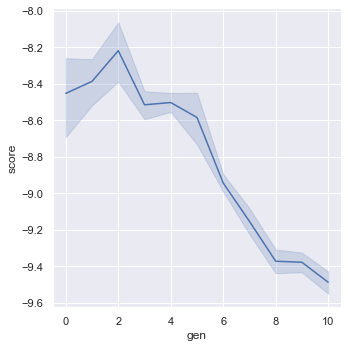

In [26]:
plt.figure(figsize=(8,6))
sns.set()
score = sns.relplot(x="gen", y="score", kind="line", data=final_joined)
plt.savefig('img/line_plot_score.svg',dpi=300)

### Binding Score and logP

In [27]:
final_joined.columns

Index(['smile', 'gen', 'id', 'source', 'weight', 'logp', 'score'], dtype='object')

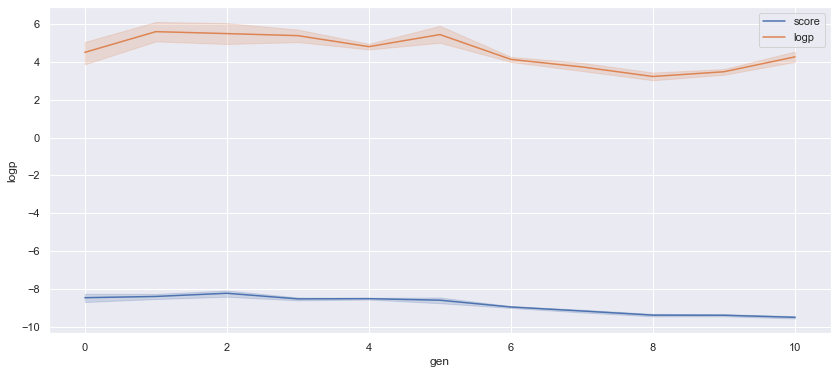

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.lineplot(y=final_joined['score'],x=final_joined['gen'], label="score")
sns.lineplot(y=final_joined['logp'],x=final_joined['gen'], label="logp")

# Add label for horizontal axis
plt.xlabel("gen")

plt.savefig('img/line_plot_score_logp.svg',dpi=300)

In [29]:
final_joined[final_joined["logp"]<5].shape

(3891, 7)

<Figure size 1008x432 with 0 Axes>

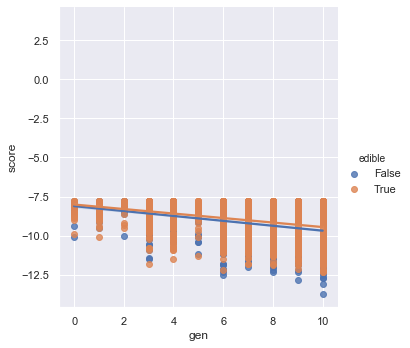

In [30]:
plt.figure(figsize=(14,6))
final["edible"] = (final_joined["logp"]<5) & (final_joined["logp"]>0)

sns.lmplot(x="gen",y="score", data=final, hue="edible")

plt.savefig('img/lm_plot_score_edible.svg',dpi=300)

### Max, Mean, Min of score

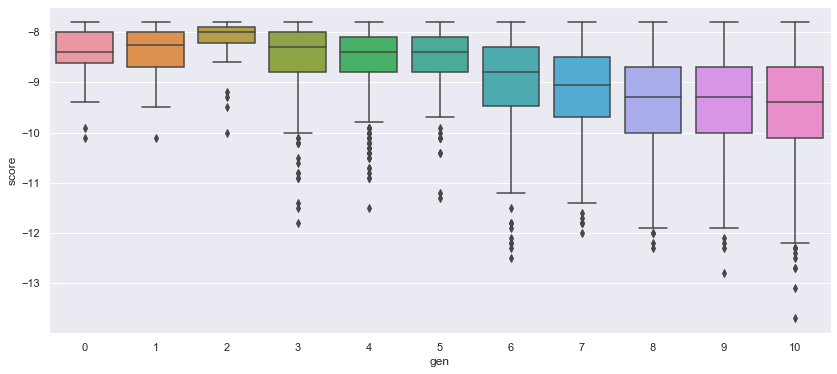

In [31]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.boxplot(x="gen", y="score", data=final_joined)

# Add label for horizontal axis
plt.xlabel("gen")

sns.set()
plt.savefig('img/box_plot_score.svg',dpi=300)

### Max, Mean and Min of logP

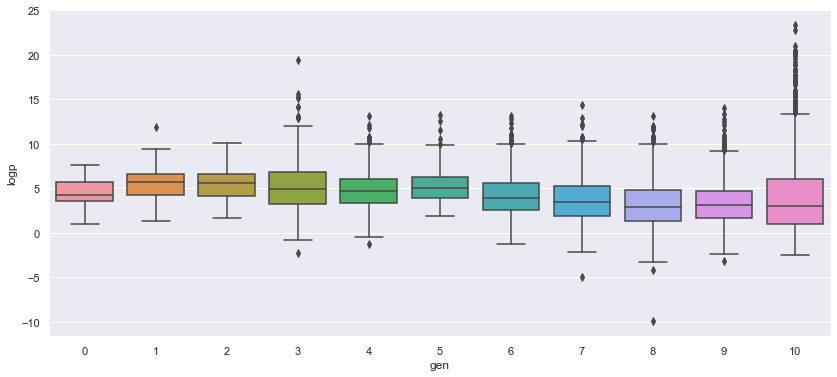

In [32]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.boxplot(x="gen", y="logp", data=final_joined)

# Add label for horizontal axis
plt.xlabel("gen")

sns.set()
plt.savefig('img/box_plot_logp.svg',dpi=300)

# Box Plot for gen 15

In [39]:
gen15 = final_joined.copy()
gen15 = gen15[gen15['gen']==15]
print(gen15.shape)

# Score
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.boxplot(x="gen", y="logp", data=gen15)

# Add label for horizontal axis
plt.xlabel("gen")

(0, 7)


ValueError: min() arg is an empty sequence

<Figure size 1008x432 with 0 Axes>

### Gaussian of the logP

C:\Users\user\Anaconda3\envs\tfv2\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\user\Anaconda3\envs\tfv2\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\Anaconda3\envs\tfv2\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\user\Anaconda3\envs\tfv2\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\Anaconda3\envs\tfv2\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\user\Anaconda3\envs\tfv2\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


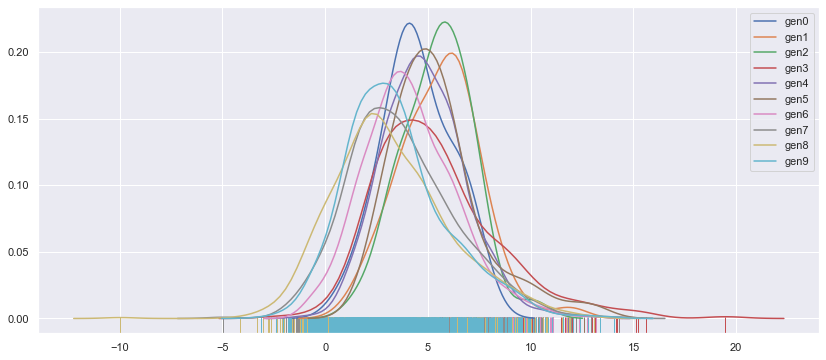

In [40]:
# Sort the dataframe by target
plt.figure(figsize=(14,6))

gen0_dist = final_joined.loc[final_joined['gen'] == 0]
gen1_dist = final_joined.loc[final_joined['gen'] == 1]
gen2_dist = final_joined.loc[final_joined['gen'] == 2]
gen3_dist = final_joined.loc[final_joined['gen'] == 3]
gen4_dist = final_joined.loc[final_joined['gen'] == 4]
gen5_dist = final_joined.loc[final_joined['gen'] == 5]
gen6_dist = final_joined.loc[final_joined['gen'] == 6]
gen7_dist = final_joined.loc[final_joined['gen'] == 7]
gen8_dist = final_joined.loc[final_joined['gen'] == 8]
gen9_dist = final_joined.loc[final_joined['gen'] == 9]
gen10_dist = final_joined.loc[final_joined['gen'] == 10]
gen11_dist = final_joined.loc[final_joined['gen'] == 11]
gen12_dist = final_joined.loc[final_joined['gen'] == 12]


sns.distplot(gen0_dist[['logp']], hist=False, rug=True, label="gen0")
sns.distplot(gen1_dist[['logp']], hist=False, rug=True, label="gen1")
sns.distplot(gen2_dist[['logp']], hist=False, rug=True, label="gen2")
sns.distplot(gen3_dist[['logp']], hist=False, rug=True, label="gen3")
sns.distplot(gen4_dist[['logp']], hist=False, rug=True, label="gen4")
sns.distplot(gen5_dist[['logp']], hist=False, rug=True, label="gen5")
sns.distplot(gen6_dist[['logp']], hist=False, rug=True, label="gen6")
sns.distplot(gen7_dist[['logp']], hist=False, rug=True, label="gen7")
sns.distplot(gen8_dist[['logp']], hist=False, rug=True, label="gen8")
sns.distplot(gen9_dist[['logp']], hist=False, rug=True, label="gen9")
sns.distplot(gen10_dist[['logp']], hist=False, rug=True, label="gen10")
sns.distplot(gen11_dist[['logp']], hist=False, rug=True, label="gen11")
sns.distplot(gen12_dist[['logp']], hist=False, rug=True, label="gen12")





### Correlations between attributes

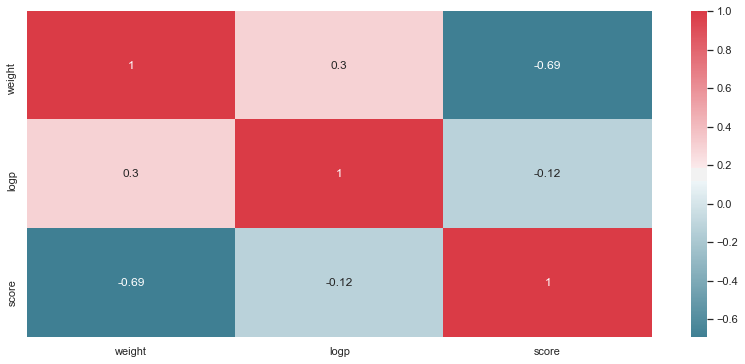

In [41]:
plt.figure(figsize=(14,6))
corr = final_joined.loc[:,final_joined.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, annot=True, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

### Violin Plot

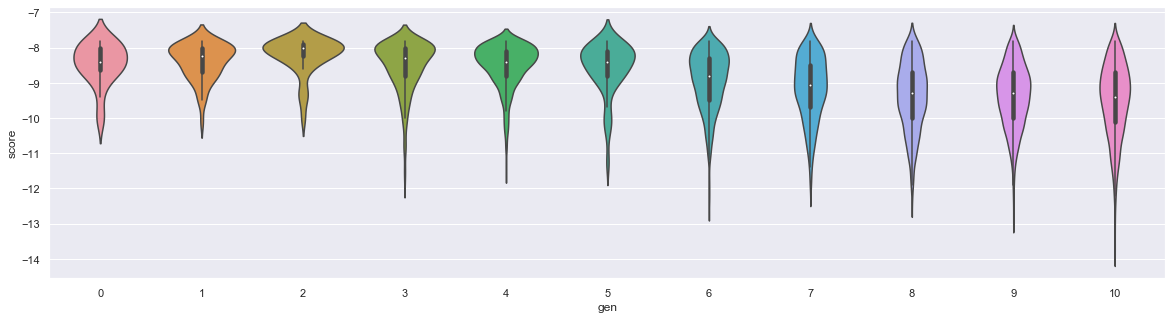

In [33]:
plt.figure(figsize=(20,5))
sns.violinplot(x="gen", y="score", data=final_joined)

sns.set()
plt.savefig('img/violin_plot_score.svg',dpi=300)

### KDE jointplot 

<Figure size 1440x360 with 0 Axes>

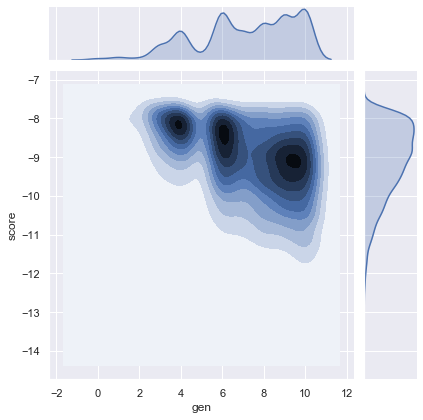

In [34]:
plt.figure(figsize=(20,5))

sns.jointplot(x="gen", y="score", data=final_joined, kind="kde")

sns.set()
plt.savefig('img/kde_joinplot_score.svg',dpi=300)